# SurveySim Cookbook

In [1]:
%matplotlib inline

## `Area`
First import the `Area` class

In [2]:
from surveysim.area import Area

### From a shapefile
To load an existing shapefile, use `Area.from_shapefile()`

This method requires a shapefile of just one polygon. (See below for a method to make `Area` objects out of a shapefile that contains many polygons.)

In [3]:
my_area = Area.from_shapefile(name = 'area_shp', path = '../data/area_test/SS_municipio.shp')

Let's inspect the attributes of the `Area`

In [4]:
my_area.__dict__

{'name': 'area_shp',
 'vis': 1.0,
 'vis_type': 'scalar',
 'shape': <shapely.geometry.polygon.Polygon at 0x1924a74518>,
 'data':   area_name  visibility                                           geometry
 0  area_shp         1.0  POLYGON ((531488.0310000005 4390865.6525, 5315...}

And now, because `Area.df` is a `geopandas GeoDataFrame`, we can use its plotting capabilities (which ultimately come from `matplotlib`). This is helpful for a quick check to make sure everything looks as we expect.

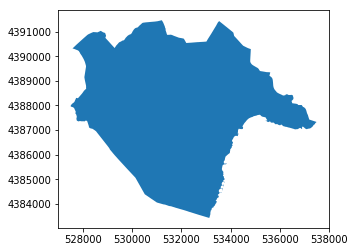

In [5]:
my_area.df.plot()

### From a shapely Polygon
`shapely` is the library that forms the basis for `geopandas`. It gives us a lot of flexibility to create custom shapes to use as an `Area`. `shapely` is a required dependency of `surveysim`, so it should already be installed. Let's import it.

In [6]:
from shapely.geometry import Polygon

We can make a `Polygon` from a list of coordinates. If you are making an `Area` from a `shapely Polygon`, it is likely that you are exploring a hypothetical scenario. In that case, it will be easiest if you choose a reasonable set of coordinates. For example, if you are creating a rectangle, situate the lower left corner at (0, 0).

In [7]:
width = 100
height = 10

lower_left = (0, 0)
upper_left = (0, height)
upper_right = (width, height)
lower_right = (width, 0)
coordinate_list = [lower_left, upper_left, upper_right, lower_right]

rectangle = Polygon(coordinate_list)

The `shapely` package has some simple plotting capabilities, so you can inspect your objects by calling them.

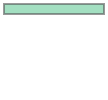

In [8]:
rectangle

That looks more or less like we expected. Now, let's turn it into an `Area`.

In [9]:
rectangle_area = Area.from_shapely_polygon('area_rect', rectangle)

In [10]:
rectangle_area.__dict__

{'name': 'area_rect',
 'vis': 1.0,
 'vis_type': 'scalar',
 'shape': <shapely.geometry.polygon.Polygon at 0x1a24f145f8>,
 'data':    area_name  visibility                                   geometry
 0  area_rect         1.0  POLYGON ((0 0, 0 10, 100 10, 100 0, 0 0))}

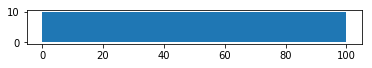

In [11]:
rectangle_area.df.plot()